Steps of ABC:

1- Generate initial randomized population an evaluate them.

2- Movement of recruited bees.

3- Send onlooker bees. (Calculate probabilities -> Select site -> Generate new solution -> Evaluation)

4- If there is a site which is reached to the the number of unproceeded counts, that site will be replaced randomly with another one.

5- If end conditions are not met yet, return to the step 2, else the end.

This algorithm just works for continuous space.


In [149]:
#import libraries
import numpy as np
import copy
import random as rd
import matplotlib.pyplot as plt

In [150]:
#define function

def sphere(x):
    return np.sum(np.power(x,2))

In [151]:
#problem definition
def costFunction(x):
    return sphere(x)

nVar = 5        #number of decision variable
varSize = nVar  #decision variable matrix size
varMin = -20    # decision variable lower bound,  can be changed to array
varMax = 20     #decision variable upper bound, can be changed to array


In [152]:
#ABC Settings
nPop  = 20      # number of population, scout B

nOnlooker = nPop    #number of onlookers bees

maxIt = 200     #Maximum number of iteration

a_limit = int(round(0.3 *nPop * nVar,0))     #Abandonment Limit Parameter

acu = 1      #acceleration coefficient damp rate
acu_damp = 1.002

In [153]:
#Initialization

#empty_bee structure
bee_positions = []
bee_costs = []

#Initialize best solution ever found
bestSol_cost = np.inf
bestSol_position = []

#create initial population
for i in range(nPop):
    position = np.random.uniform(varMin,varMax,nVar).tolist()
    bee_positions.append(position)

    cost = costFunction(position)
    bee_costs.append(cost)

    if cost <= bestSol_cost:
        bestSol_cost = cost
        bestSol_position = position

#Abandonment Counter
C = np.zeros((nPop,1))

#List of best costs in iteration
BestCost = []

In [154]:
def roulettWheelSelection(P):
    rNum = rd.random()
    C = np.cumsum(P)
    return min(np.where(rNum <= C)[0])

In [155]:
#ABC Main loop
for it in range(maxIt):
    #Recruited Bees
    for i in range(nPop):
        newPopPosition = bee_positions[i]
        newPopCost =  bee_costs[i]

        K = [x for x in range(nPop) if x !=i]
        #random number from K not equal to i
        k =  K[rd.randint(0,len(K)-1)]

        #define accelaration coef
        phi = np.random.uniform(-acu, acu, varSize)

        #new bee position
        multi_List = [a - b for a, b in zip(bee_positions[i], bee_positions[k])]
        newPopPosition = bee_positions[i] + [s * u for s,u in zip(phi,multi_List)]

        #Evaluation
        newPopCost = costFunction(newPopPosition)

        #Comparision
        if newPopCost <= bee_costs[i]:
            bee_positions[i] = newPopPosition
            bee_costs[i] = newPopCost
        else:
            C[i] += C[i]


    #calculate fitness values and selection probabilities
    FF = np.zeros((nPop,1))
    for i in range(nPop):
        if bee_costs[i] >=0:
            FF[i] = 1 / (1 + bee_costs[i])
        else:
            FF[i] = 1 + abs(1 + bee_costs[i])

    P = FF / sum(FF)

    #onlooker Bees
    for ol in range(nOnlooker):
        #select source site
        p = roulettWheelSelection(P)

        K = [x for x in range(nPop) if x !=p]
        #random number from K not equal to p
        k =  K[rd.randint(0,len(K)-1)]

        #define accelaration coef
        phi = np.random.uniform(-acu, acu, varSize).tolist()

        #new bee position
        multi_List = [a - b for a, b in zip(bee_positions[p], bee_positions[k])]
        newPopPosition = bee_positions[p] + [s * u for s,u in zip(phi,multi_List)]
        #Evaluation
        newPopCost = costFunction(newPopPosition)

        #Comparision
        if newPopCost <= bee_costs[p]:
            bee_positions[p] = newPopPosition
            bee_costs[p] = newPopCost
        else:
            C[p] += 1

    #scout Bees
    for i in range(nPop):
        if C[i] >= a_limit:
            position = np.random.uniform(varMin,varMax,nVar).tolist()
            bee_positions[i] = position

            cost = costFunction(bee_positions[i])
            bee_costs[i] = cost
            C[i] = 0

    #Update best solution ever found
    for i in range(nPop):
        if bee_costs[i] <= bestSol_cost:
            bestSol_position = bee_positions[i]
            bestSol_cost = bee_costs[i]

    #Store best cost ever cost
    BestCost.append(bestSol_cost)

    # Damp Acc Rate
    acu = acu * acu_damp

    #Show Iteration Information
    print('Iteration ' + str(it) +": Best Cost = " + str(BestCost[it]))

Iteration 0: Best Cost = 221.0366418529067
Iteration 1: Best Cost = 221.0366418529067
Iteration 2: Best Cost = 221.0366418529067
Iteration 3: Best Cost = 221.0366418529067
Iteration 4: Best Cost = 221.0366418529067
Iteration 5: Best Cost = 221.0366418529067
Iteration 6: Best Cost = 221.0366418529067
Iteration 7: Best Cost = 221.0366418529067
Iteration 8: Best Cost = 221.0366418529067
Iteration 9: Best Cost = 221.0366418529067
Iteration 10: Best Cost = 221.0366418529067
Iteration 11: Best Cost = 221.0366418529067
Iteration 12: Best Cost = 221.0366418529067
Iteration 13: Best Cost = 221.0366418529067
Iteration 14: Best Cost = 221.0366418529067
Iteration 15: Best Cost = 221.0366418529067
Iteration 16: Best Cost = 221.0366418529067
Iteration 17: Best Cost = 221.0366418529067
Iteration 18: Best Cost = 221.0366418529067
Iteration 19: Best Cost = 221.0366418529067
Iteration 20: Best Cost = 221.0366418529067
Iteration 21: Best Cost = 221.0366418529067
Iteration 22: Best Cost = 221.036641852906

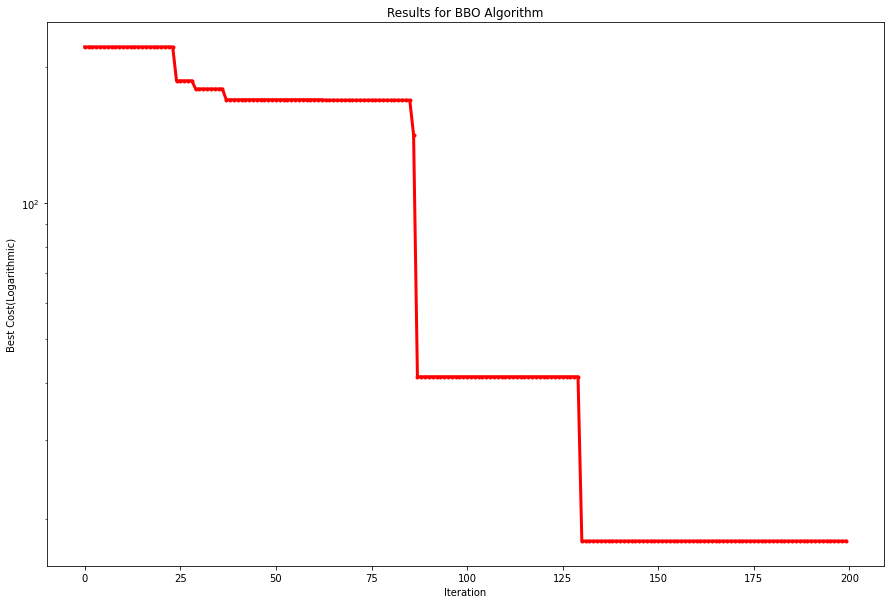

In [156]:
#Plot the cost results
plt.figure(figsize=(15, 10))
plt.plot(BestCost, 'ro-', label='Cost Results', linewidth=3, markersize=3)
plt.yscale('log')
plt.title('Results for BBO Algorithm')
plt.ylabel('Best Cost(Logarithmic)')
plt.xlabel('Iteration')
plt.show()